In [1]:
############### Importing required libraries ###############
import numpy as np
import pandas as pd 
import keras
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout,Input,Conv2D,MaxPooling2D,BatchNormalization,GaussianNoise,GlobalAveragePooling2D
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from matplotlib import image
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

/kaggle/input/covid-chest-xray/metadata.csv
/kaggle/input/covid-chest-xray/annotations/imageannotation_ai_lung_bounding_boxes.json
/kaggle/input/covid-chest-xray/images/58cb9263f16e94305c730685358e4e_jumbo.jpeg
/kaggle/input/covid-chest-xray/images/covid-19-pneumonia-progression-and-regression-day20.jpg
/kaggle/input/covid-chest-xray/images/16663_1_2.jpg
/kaggle/input/covid-chest-xray/images/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
/kaggle/input/covid-chest-xray/images/aspiration-pneumonia-5-day10.jpg
/kaggle/input/covid-chest-xray/images/ciaa199.pdf-001-a.png
/kaggle/input/covid-chest-xray/images/kjr-21-e24-g002-l-c.jpg
/kaggle/input/covid-chest-xray/images/parapneumonic-effusion-1-L.png
/kaggle/input/covid-chest-xray/images/covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-admission.jpg
/kaggle/input/covid-chest-xray/images/ARDSSevere.png
/kaggle/input/covid-chest-xray/images/2966893D-5DDF-4B68-9E2B-4979D5956C8E.jpeg
/kaggle/input/covid-chest-xray/ima

/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person1676_virus_2892.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/NORMAL2-IM-0336-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person1650_virus_2852.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person22_virus_55.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/IM-0101-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person122_bacteria_582.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person85_bacteria_417.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dat

/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1180_virus_2010.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1230_virus_2081.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1513_virus_2632.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-0771-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person124_virus_238.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person746_virus_1369.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person588_bacteria_2422.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronah

/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-1027-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1102_bacteria_3043.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1943_bacteria_4868.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person351_virus_726.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person489_virus_995.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person307_bacteria_1441.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person978_virus_1653.jpeg
/kaggle/input/coronahack-chest-xraydataset/Cor

/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1647_bacteria_4372.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0428-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0240-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person727_virus_1347.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person259_bacteria_1219.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1706_bacteria_4516.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1242_bacteria_3198.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Ch

In [ ]:
############### printing all files available ###############
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
############### reading data from dataset1 using pandas ###############
meta_data1=pd.read_csv('../input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv')
meta_data1.head()

Unnamed: 0   X_ray_image_name   Label Dataset_type Label_2_Virus_category  \
0           0  IM-0128-0001.jpeg  Normal        TRAIN                    NaN   
1           1  IM-0127-0001.jpeg  Normal        TRAIN                    NaN   
2           2  IM-0125-0001.jpeg  Normal        TRAIN                    NaN   
3           3  IM-0122-0001.jpeg  Normal        TRAIN                    NaN   
4           4  IM-0119-0001.jpeg  Normal        TRAIN                    NaN   

  Label_1_Virus_category  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

In [3]:
############### defining train and test directory paths ###############
train_dir='../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'
test_dir='../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'

In [4]:
############### adding file path ###############
meta_data1['File_path']=''
meta_data1.loc[meta_data1['Dataset_type']=='TRAIN','File_path']=train_dir+'/'
meta_data1.loc[meta_data1['Dataset_type']=='TEST','File_path']=test_dir+'/'
meta_data1.head()

Unnamed: 0   X_ray_image_name   Label Dataset_type Label_2_Virus_category  \
0           0  IM-0128-0001.jpeg  Normal        TRAIN                    NaN   
1           1  IM-0127-0001.jpeg  Normal        TRAIN                    NaN   
2           2  IM-0125-0001.jpeg  Normal        TRAIN                    NaN   
3           3  IM-0122-0001.jpeg  Normal        TRAIN                    NaN   
4           4  IM-0119-0001.jpeg  Normal        TRAIN                    NaN   

  Label_1_Virus_category                                          File_path  
0                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...  
1                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...  
2                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...  
3                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...  
4                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...

In [5]:
############### adding image path ###############
meta_data1['img_path']=meta_data1['File_path']+meta_data1['X_ray_image_name']
meta_data1.head()

Unnamed: 0   X_ray_image_name   Label Dataset_type Label_2_Virus_category  \
0           0  IM-0128-0001.jpeg  Normal        TRAIN                    NaN   
1           1  IM-0127-0001.jpeg  Normal        TRAIN                    NaN   
2           2  IM-0125-0001.jpeg  Normal        TRAIN                    NaN   
3           3  IM-0122-0001.jpeg  Normal        TRAIN                    NaN   
4           4  IM-0119-0001.jpeg  Normal        TRAIN                    NaN   

  Label_1_Virus_category                                          File_path  \
0                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...   
1                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...   
2                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...   
3                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...   
4                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...   

                                            img_path  
0  ../input/coronahack-chest-xraydataset/Coronaha...  
1  ../input/coronahack-chest-xraydataset/Coronaha...  
2  ../input/coronahack-chest-xraydataset/Coronaha...  
3  ../input/coronahack-chest-xraydataset/Coronaha...  
4  ../input/coronahack-chest-xraydataset/Coronaha...

In [6]:
############### printing attributes of dataset1 ###############
meta_data1.columns

Index(['Unnamed: 0', 'X_ray_image_name', 'Label', 'Dataset_type',
       'Label_2_Virus_category', 'Label_1_Virus_category', 'File_path',
       'img_path'],
      dtype='object')

In [7]:
############### dropping redundant attributes ###############
meta_data1=meta_data1.drop(['Unnamed: 0'],axis=1)
meta_data1.head()

X_ray_image_name   Label Dataset_type Label_2_Virus_category  \
0  IM-0128-0001.jpeg  Normal        TRAIN                    NaN   
1  IM-0127-0001.jpeg  Normal        TRAIN                    NaN   
2  IM-0125-0001.jpeg  Normal        TRAIN                    NaN   
3  IM-0122-0001.jpeg  Normal        TRAIN                    NaN   
4  IM-0119-0001.jpeg  Normal        TRAIN                    NaN   

  Label_1_Virus_category                                          File_path  \
0                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...   
1                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...   
2                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...   
3                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...   
4                    NaN  ../input/coronahack-chest-xraydataset/Coronaha...   

                                            img_path  
0  ../input/coronahack-chest-xraydataset/Coronaha...  
1  ../input/coronahack-chest-xraydataset/Coronaha...  
2  ../input/coronahack-chest-xraydataset/Coronaha...  
3  ../input/coronahack-chest-xraydataset/Coronaha...  
4  ../input/coronahack-chest-xraydataset/Coronaha...

In [8]:
############### reading dataset2 using pandas ###############
meta_data2=pd.read_csv('../input/covid-chest-xray/metadata.csv')
meta_data2.head()

patientid  offset sex   age   finding survival intubated  \
0          2     0.0   M  65.0  COVID-19        Y       NaN   
1          2     3.0   M  65.0  COVID-19        Y       NaN   
2          2     5.0   M  65.0  COVID-19        Y       NaN   
3          2     6.0   M  65.0  COVID-19        Y       NaN   
4          4     0.0   F  52.0  COVID-19      NaN       NaN   

  intubation_present went_icu in_icu  ...              date  \
0                NaN      NaN    NaN  ...  January 22, 2020   
1                NaN      NaN    NaN  ...  January 25, 2020   
2                NaN      NaN    NaN  ...  January 27, 2020   
3                NaN      NaN    NaN  ...  January 28, 2020   
4                NaN      NaN    NaN  ...  January 25, 2020   

                                            location  folder  \
0        Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
1        Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
2        Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
3        Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
4  Changhua Christian Hospital, Changhua City, Ta...  images   

                                            filename                   doi  \
0  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
1  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
2  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
3  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
4                              nejmc2001573_f1a.jpeg  10.1056/NEJMc2001573   

                                                 url  license  \
0  https://www.nejm.org/doi/full/10.1056/NEJMc200...      NaN   
1  https://www.nejm.org/doi/full/10.1056/NEJMc200...      NaN   
2  https://www.nejm.org/doi/full/10.1056/NEJMc200...      NaN   
3  https://www.nejm.org/doi/full/10.1056/NEJMc200...      NaN   
4  https://www.nejm.org/doi/full/10.1056/NEJMc200...      NaN   

                                      clinical_notes other_notes Unnamed: 28  
0  On January 22, 2020, a 65-year-old man with a ...         NaN         NaN  
1  On January 22, 2020, a 65-year-old man with a ...         NaN         NaN  
2  On January 22, 2020, a 65-year-old man with a ...         NaN         NaN  
3  On January 22, 2020, a 65-year-old man with a ...         NaN         NaN  
4   diffuse infiltrates in the bilateral lower lungs         NaN         NaN  

[5 rows x 29 columns]

In [9]:
############### printing attributes of dataset2 ###############
meta_data2.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'survival', 'intubated',
       'intubation_present', 'went_icu', 'in_icu', 'needed_supplemental_O2',
       'extubated', 'temperature', 'pO2_saturation', 'leukocyte_count',
       'neutrophil_count', 'lymphocyte_count', 'view', 'modality', 'date',
       'location', 'folder', 'filename', 'doi', 'url', 'license',
       'clinical_notes', 'other_notes', 'Unnamed: 28'],
      dtype='object')

In [10]:
############### dropping redundant attributes from dataset2 ###############
meta_data2=meta_data2.drop(['patientid', 'offset', 'sex', 'age', 'survival', 'intubated',
       'intubation_present', 'went_icu', 'in_icu', 'needed_supplemental_O2',
       'extubated', 'temperature', 'pO2_saturation', 'leukocyte_count',
       'neutrophil_count', 'lymphocyte_count', 'view', 'date',
       'location', 'folder', 'doi', 'url', 'license',
       'clinical_notes', 'other_notes', 'Unnamed: 28'],axis=1)
meta_data2.head()

finding modality                                           filename
0  COVID-19    X-ray  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1  COVID-19    X-ray  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2  COVID-19    X-ray  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3  COVID-19    X-ray  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4  COVID-19    X-ray                              nejmc2001573_f1a.jpeg

In [11]:
############### filtering dataset2 ###############
meta_data2=meta_data2[meta_data2['modality']=='X-ray']
meta_data2.sample(5)

finding modality                                           filename
16           SARS    X-ray  SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...
147      COVID-19    X-ray                            kjr-21-e25-g001-l-a.jpg
296      COVID-19    X-ray                    covid-19-pneumonia-41-day-2.jpg
55       COVID-19    X-ray                        covid-19-pneumonia-14-L.png
62   Pneumocystis    X-ray                     pneumocystis-pneumonia-2-L.png

In [12]:
############### filtering dataset2 ###############
meta_data2=meta_data2.drop(['modality'],axis=1)
meta_data2=meta_data2.rename(columns={'filename':'X_ray_image_name','finding':'Label'})
meta_data2['Label_1_Virus_category']=''
meta_data2['Label_2_Virus_category']=''
meta_data2['Dataset_type']=''
meta_data2.head()

Label                                   X_ray_image_name  \
0  COVID-19  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...   
1  COVID-19  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...   
2  COVID-19  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...   
3  COVID-19  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...   
4  COVID-19                              nejmc2001573_f1a.jpeg   

  Label_1_Virus_category Label_2_Virus_category Dataset_type  
0                                                             
1                                                             
2                                                             
3                                                             
4

In [13]:
############### filtering dataset2 ###############
c_list=['X_ray_image_name','Label','Dataset_type','Label_2_Virus_category','Label_1_Virus_category']
meta_data2=meta_data2[c_list]
meta_data2.head()

X_ray_image_name     Label Dataset_type  \
0  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...  COVID-19                
1  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...  COVID-19                
2  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...  COVID-19                
3  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...  COVID-19                
4                              nejmc2001573_f1a.jpeg  COVID-19                

  Label_2_Virus_category Label_1_Virus_category  
0                                                
1                                                
2                                                
3                                                
4

In [14]:
############### creating file paths in dataset2 ###############
meta_data2['File_path']='../input/covid-chest-xray/images/'

In [15]:
############### creating image paths in dataset2 ###############
meta_data2['img_path']=meta_data2['File_path']+meta_data2['X_ray_image_name']
meta_data2.head()

X_ray_image_name     Label Dataset_type  \
0  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...  COVID-19                
1  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...  COVID-19                
2  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...  COVID-19                
3  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...  COVID-19                
4                              nejmc2001573_f1a.jpeg  COVID-19                

  Label_2_Virus_category Label_1_Virus_category  \
0                                                 
1                                                 
2                                                 
3                                                 
4                                                 

                           File_path  \
0  ../input/covid-chest-xray/images/   
1  ../input/covid-chest-xray/images/   
2  ../input/covid-chest-xray/images/   
3  ../input/covid-chest-xray/images/   
4  ../input/covid-chest-xray/images/   

                                            img_path  
0  ../input/covid-chest-xray/images/auntminnie-a-...  
1  ../input/covid-chest-xray/images/auntminnie-b-...  
2  ../input/covid-chest-xray/images/auntminnie-c-...  
3  ../input/covid-chest-xray/images/auntminnie-d-...  
4  ../input/covid-chest-xray/images/nejmc2001573_...

In [16]:
############### class "ARDS" in dataset1 ###############
ards1=meta_data1[meta_data1['Label_2_Virus_category']=='ARDS']
ards1

X_ray_image_name     Label Dataset_type  \
5231    acute-respiratory-distress-syndrome-ards.jpg  Pnemonia        TRAIN   
5232  acute-respiratory-distress-syndrome-ards-1.jpg  Pnemonia        TRAIN   

     Label_2_Virus_category Label_1_Virus_category  \
5231                   ARDS         Stress-Smoking   
5232                   ARDS         Stress-Smoking   

                                              File_path  \
5231  ../input/coronahack-chest-xraydataset/Coronaha...   
5232  ../input/coronahack-chest-xraydataset/Coronaha...   

                                               img_path  
5231  ../input/coronahack-chest-xraydataset/Coronaha...  
5232  ../input/coronahack-chest-xraydataset/Coronaha...

In [17]:
############### class "ARDS" in dataset2 ###############
ards2=meta_data2[meta_data2['Label']=='ARDS']
ards2

X_ray_image_name Label Dataset_type  \
6                                   ARDSSevere.png  ARDS                
58  acute-respiratory-distress-syndrome-ards-1.jpg  ARDS                
59    acute-respiratory-distress-syndrome-ards.jpg  ARDS                
60          ards-secondary-to-tiger-snake-bite.png  ARDS                

   Label_2_Virus_category Label_1_Virus_category  \
6                                                  
58                                                 
59                                                 
60                                                 

                            File_path  \
6   ../input/covid-chest-xray/images/   
58  ../input/covid-chest-xray/images/   
59  ../input/covid-chest-xray/images/   
60  ../input/covid-chest-xray/images/   

                                             img_path  
6     ../input/covid-chest-xray/images/ARDSSevere.png  
58  ../input/covid-chest-xray/images/acute-respira...  
59  ../input/covid-chest-xray/images/acute-respira...  
60  ../input/covid-chest-xray/images/ards-secondar...

In [18]:
############### preparing data for various classes available ###############
normal=meta_data1[meta_data1['Label']=='Normal'].sample(10)
covid=meta_data1[(meta_data1['Label']=='Pnemonia') & (meta_data1['Label_2_Virus_category']=='COVID-19')].sample(10)
ards=pd.concat([ards1,ards2])
sars=meta_data2[meta_data2['Label']=='SARS']
strept=meta_data2[meta_data2['Label']=='Streptococcus']

In [19]:
############### training data is prepared ###############
data=pd.concat([normal,covid,ards,sars,strept])
data

X_ray_image_name          Label  \
1320                          NORMAL2-IM-1351-0001.jpeg         Normal   
265                                   IM-0459-0001.jpeg         Normal   
740                           NORMAL2-IM-0536-0001.jpeg         Normal   
1043                          NORMAL2-IM-0989-0001.jpeg         Normal   
855                           NORMAL2-IM-0725-0001.jpeg         Normal   
222                              IM-0439-0001-0001.jpeg         Normal   
201                                   IM-0388-0001.jpeg         Normal   
1155                          NORMAL2-IM-1161-0001.jpeg         Normal   
306                                   IM-0486-0001.jpeg         Normal   
370                                   IM-0534-0001.jpeg         Normal   
5274       1-s2.0-S1684118220300682-main.pdf-003-b2.png       Pnemonia   
5256          6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg       Pnemonia   
5272          171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg       Pnemonia   
5226                           jkms-35-e79-g001-l-b.jpg       Pnemonia   
5243          E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg       Pnemonia   
5285          01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg       Pnemonia   
5230                          all14238-fig-0001-m-b.jpg       Pnemonia   
5244          D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg       Pnemonia   
5278          1-s2.0-S1684118220300608-main.pdf-002.jpg       Pnemonia   
5223                            kjr-21-e24-g002-l-a.jpg       Pnemonia   
5231       acute-respiratory-distress-syndrome-ards.jpg       Pnemonia   
5232     acute-respiratory-distress-syndrome-ards-1.jpg       Pnemonia   
6                                        ARDSSevere.png           ARDS   
58       acute-respiratory-distress-syndrome-ards-1.jpg           ARDS   
59         acute-respiratory-distress-syndrome-ards.jpg           ARDS   
60               ards-secondary-to-tiger-snake-bite.png           ARDS   
9     SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....           SARS   
10    SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....           SARS   
11    SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...           SARS   
12    SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...           SARS   
13    SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...           SARS   
14    SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...           SARS   
15    SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...           SARS   
16    SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...           SARS   
17    SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...           SARS   
18    SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...           SARS   
19    SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...           SARS   
299                                       wong-0000.jpg           SARS   
300                                       wong-0002.jpg           SARS   
301                                       wong-0003.jpg           SARS   
302                                       wong-0004.jpg           SARS   
303                                       wong-0005.jpg           SARS   
63             streptococcus-pneumoniae-pneumonia-1.jpg  Streptococcus   
64                                      pneumonia-7.jpg  Streptococcus   
65    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
66    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
67    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
68    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
160                     pneumococcal-pneumonia-day0.jpg  Streptococcus   
161                     pneumococcal-pneumonia-day7.jpg  Streptococcus   
162                    pneumococcal-pneumonia-day35.jpg  Streptococcus   
163                     parapneumonic-effusion-1-PA.png  Streptococcus   
164                      parapneumonic-effusion-1-L.png  Streptococcus   
165                 right-upper-lobe-pneumo

In [20]:
############### testing data is prepared ###############
temp=data[(data['Label']=='Normal') &(data['Dataset_type']=='TRAIN')].sample(5)
temp['Dataset_type']='TEST'
data=data[~data['X_ray_image_name'].isin(temp['X_ray_image_name'])]
data.loc[data['Dataset_type']=='TEST','Dataset_type']='TRAIN'
data=pd.concat([data,temp])
data

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


X_ray_image_name          Label  \
1320                          NORMAL2-IM-1351-0001.jpeg         Normal   
265                                   IM-0459-0001.jpeg         Normal   
740                           NORMAL2-IM-0536-0001.jpeg         Normal   
201                                   IM-0388-0001.jpeg         Normal   
306                                   IM-0486-0001.jpeg         Normal   
5274       1-s2.0-S1684118220300682-main.pdf-003-b2.png       Pnemonia   
5256          6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg       Pnemonia   
5272          171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg       Pnemonia   
5226                           jkms-35-e79-g001-l-b.jpg       Pnemonia   
5243          E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg       Pnemonia   
5285          01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg       Pnemonia   
5230                          all14238-fig-0001-m-b.jpg       Pnemonia   
5244          D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg       Pnemonia   
5278          1-s2.0-S1684118220300608-main.pdf-002.jpg       Pnemonia   
5223                            kjr-21-e24-g002-l-a.jpg       Pnemonia   
5231       acute-respiratory-distress-syndrome-ards.jpg       Pnemonia   
5232     acute-respiratory-distress-syndrome-ards-1.jpg       Pnemonia   
6                                        ARDSSevere.png           ARDS   
58       acute-respiratory-distress-syndrome-ards-1.jpg           ARDS   
59         acute-respiratory-distress-syndrome-ards.jpg           ARDS   
60               ards-secondary-to-tiger-snake-bite.png           ARDS   
9     SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....           SARS   
10    SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....           SARS   
11    SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...           SARS   
12    SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...           SARS   
13    SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...           SARS   
14    SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...           SARS   
15    SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...           SARS   
16    SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...           SARS   
17    SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...           SARS   
18    SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...           SARS   
19    SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...           SARS   
299                                       wong-0000.jpg           SARS   
300                                       wong-0002.jpg           SARS   
301                                       wong-0003.jpg           SARS   
302                                       wong-0004.jpg           SARS   
303                                       wong-0005.jpg           SARS   
63             streptococcus-pneumoniae-pneumonia-1.jpg  Streptococcus   
64                                      pneumonia-7.jpg  Streptococcus   
65    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
66    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
67    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
68    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
160                     pneumococcal-pneumonia-day0.jpg  Streptococcus   
161                     pneumococcal-pneumonia-day7.jpg  Streptococcus   
162                    pneumococcal-pneumonia-day35.jpg  Streptococcus   
163                     parapneumonic-effusion-1-PA.png  Streptococcus   
164                      parapneumonic-effusion-1-L.png  Streptococcus   
165                 right-upper-lobe-pneumonia-9-PA.jpg  Streptococcus   
166                  right-upper-lobe-pneumonia-9-L.jpg  Streptococcus   
173                  cavitating-pneumonia-4-day0-PA.jpg  Streptococcus   
174                   cavitating-pneumonia-4-day0-L.jpg  Streptococcus   
175                 cavitating-pneumonia-4-day28-PA.png  Streptococcus   
176                  cavitating-pneumonia-4

In [21]:
############### data preparation ###############
temp=data[(data['Label']=='Pnemonia') &(data['Label_2_Virus_category']=='COVID-19')].sample(5)
temp['Dataset_type']='TEST'
data=data[~data['X_ray_image_name'].isin(temp['X_ray_image_name'])]
data=pd.concat([data,temp])
data

X_ray_image_name          Label  \
1320                          NORMAL2-IM-1351-0001.jpeg         Normal   
265                                   IM-0459-0001.jpeg         Normal   
740                           NORMAL2-IM-0536-0001.jpeg         Normal   
201                                   IM-0388-0001.jpeg         Normal   
306                                   IM-0486-0001.jpeg         Normal   
5256          6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg       Pnemonia   
5272          171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg       Pnemonia   
5243          E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg       Pnemonia   
5230                          all14238-fig-0001-m-b.jpg       Pnemonia   
5278          1-s2.0-S1684118220300608-main.pdf-002.jpg       Pnemonia   
5231       acute-respiratory-distress-syndrome-ards.jpg       Pnemonia   
5232     acute-respiratory-distress-syndrome-ards-1.jpg       Pnemonia   
6                                        ARDSSevere.png           ARDS   
58       acute-respiratory-distress-syndrome-ards-1.jpg           ARDS   
59         acute-respiratory-distress-syndrome-ards.jpg           ARDS   
60               ards-secondary-to-tiger-snake-bite.png           ARDS   
9     SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....           SARS   
10    SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....           SARS   
11    SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...           SARS   
12    SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...           SARS   
13    SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...           SARS   
14    SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...           SARS   
15    SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...           SARS   
16    SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...           SARS   
17    SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...           SARS   
18    SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...           SARS   
19    SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...           SARS   
299                                       wong-0000.jpg           SARS   
300                                       wong-0002.jpg           SARS   
301                                       wong-0003.jpg           SARS   
302                                       wong-0004.jpg           SARS   
303                                       wong-0005.jpg           SARS   
63             streptococcus-pneumoniae-pneumonia-1.jpg  Streptococcus   
64                                      pneumonia-7.jpg  Streptococcus   
65    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
66    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
67    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
68    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
160                     pneumococcal-pneumonia-day0.jpg  Streptococcus   
161                     pneumococcal-pneumonia-day7.jpg  Streptococcus   
162                    pneumococcal-pneumonia-day35.jpg  Streptococcus   
163                     parapneumonic-effusion-1-PA.png  Streptococcus   
164                      parapneumonic-effusion-1-L.png  Streptococcus   
165                 right-upper-lobe-pneumonia-9-PA.jpg  Streptococcus   
166                  right-upper-lobe-pneumonia-9-L.jpg  Streptococcus   
173                  cavitating-pneumonia-4-day0-PA.jpg  Streptococcus   
174                   cavitating-pneumonia-4-day0-L.jpg  Streptococcus   
175                 cavitating-pneumonia-4-day28-PA.png  Streptococcus   
176                  cavitating-pneumonia-4-day28-L.png  Streptococcus   
1155                          NORMAL2-IM-1161-0001.jpeg         Normal   
1043                          NORMAL2-IM-0989-0001.jpeg         Normal   
370                                   IM-0534-0001.jpeg         Normal   
855                           NORMAL2-IM-0725-0001.jpeg         Normal   
222                              IM-0439-00

In [22]:
############### data preparation ###############
temp=data[data['Label']=='SARS'].sample(5)
temp['Dataset_type']='TEST'
data=data[~data['X_ray_image_name'].isin(temp['X_ray_image_name'])]
data.loc[data['Label']=='SARS','Dataset_type']='TRAIN'
data=pd.concat([data,temp])
data

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


X_ray_image_name          Label  \
1320                          NORMAL2-IM-1351-0001.jpeg         Normal   
265                                   IM-0459-0001.jpeg         Normal   
740                           NORMAL2-IM-0536-0001.jpeg         Normal   
201                                   IM-0388-0001.jpeg         Normal   
306                                   IM-0486-0001.jpeg         Normal   
5256          6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg       Pnemonia   
5272          171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg       Pnemonia   
5243          E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg       Pnemonia   
5230                          all14238-fig-0001-m-b.jpg       Pnemonia   
5278          1-s2.0-S1684118220300608-main.pdf-002.jpg       Pnemonia   
5231       acute-respiratory-distress-syndrome-ards.jpg       Pnemonia   
5232     acute-respiratory-distress-syndrome-ards-1.jpg       Pnemonia   
6                                        ARDSSevere.png           ARDS   
58       acute-respiratory-distress-syndrome-ards-1.jpg           ARDS   
59         acute-respiratory-distress-syndrome-ards.jpg           ARDS   
60               ards-secondary-to-tiger-snake-bite.png           ARDS   
9     SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....           SARS   
10    SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....           SARS   
12    SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...           SARS   
13    SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...           SARS   
15    SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...           SARS   
16    SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...           SARS   
17    SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...           SARS   
18    SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...           SARS   
299                                       wong-0000.jpg           SARS   
301                                       wong-0003.jpg           SARS   
303                                       wong-0005.jpg           SARS   
63             streptococcus-pneumoniae-pneumonia-1.jpg  Streptococcus   
64                                      pneumonia-7.jpg  Streptococcus   
65    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
66    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
67    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
68    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
160                     pneumococcal-pneumonia-day0.jpg  Streptococcus   
161                     pneumococcal-pneumonia-day7.jpg  Streptococcus   
162                    pneumococcal-pneumonia-day35.jpg  Streptococcus   
163                     parapneumonic-effusion-1-PA.png  Streptococcus   
164                      parapneumonic-effusion-1-L.png  Streptococcus   
165                 right-upper-lobe-pneumonia-9-PA.jpg  Streptococcus   
166                  right-upper-lobe-pneumonia-9-L.jpg  Streptococcus   
173                  cavitating-pneumonia-4-day0-PA.jpg  Streptococcus   
174                   cavitating-pneumonia-4-day0-L.jpg  Streptococcus   
175                 cavitating-pneumonia-4-day28-PA.png  Streptococcus   
176                  cavitating-pneumonia-4-day28-L.png  Streptococcus   
1155                          NORMAL2-IM-1161-0001.jpeg         Normal   
1043                          NORMAL2-IM-0989-0001.jpeg         Normal   
370                                   IM-0534-0001.jpeg         Normal   
855                           NORMAL2-IM-0725-0001.jpeg         Normal   
222                              IM-0439-0001-0001.jpeg         Normal   
5226                           jkms-35-e79-g001-l-b.jpg       Pnemonia   
5223                            kjr-21-e24-g002-l-a.jpg       Pnemonia   
5244          D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg       Pnemonia   
5274       1-s2.0-S1684118220300682-main.pdf-003-b2.png       Pnemonia   
5285          01E392EE-69F9-4E33-BFCE-E5C96

In [23]:
############### data preparation ###############
temp=data[data['Label']=='Streptococcus'].sample(5)
temp['Dataset_type']='TEST'
data=data[~data['X_ray_image_name'].isin(temp['X_ray_image_name'])]
data.loc[data['Label']=='Streptococcus','Dataset_type']='TRAIN'
data=pd.concat([data,temp])
data

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


X_ray_image_name          Label  \
1320                          NORMAL2-IM-1351-0001.jpeg         Normal   
265                                   IM-0459-0001.jpeg         Normal   
740                           NORMAL2-IM-0536-0001.jpeg         Normal   
201                                   IM-0388-0001.jpeg         Normal   
306                                   IM-0486-0001.jpeg         Normal   
5256          6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg       Pnemonia   
5272          171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg       Pnemonia   
5243          E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg       Pnemonia   
5230                          all14238-fig-0001-m-b.jpg       Pnemonia   
5278          1-s2.0-S1684118220300608-main.pdf-002.jpg       Pnemonia   
5231       acute-respiratory-distress-syndrome-ards.jpg       Pnemonia   
5232     acute-respiratory-distress-syndrome-ards-1.jpg       Pnemonia   
6                                        ARDSSevere.png           ARDS   
58       acute-respiratory-distress-syndrome-ards-1.jpg           ARDS   
59         acute-respiratory-distress-syndrome-ards.jpg           ARDS   
60               ards-secondary-to-tiger-snake-bite.png           ARDS   
9     SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....           SARS   
10    SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....           SARS   
12    SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...           SARS   
13    SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...           SARS   
15    SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...           SARS   
16    SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...           SARS   
17    SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...           SARS   
18    SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...           SARS   
299                                       wong-0000.jpg           SARS   
301                                       wong-0003.jpg           SARS   
303                                       wong-0005.jpg           SARS   
65    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
67    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
68    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
161                     pneumococcal-pneumonia-day7.jpg  Streptococcus   
162                    pneumococcal-pneumonia-day35.jpg  Streptococcus   
163                     parapneumonic-effusion-1-PA.png  Streptococcus   
164                      parapneumonic-effusion-1-L.png  Streptococcus   
165                 right-upper-lobe-pneumonia-9-PA.jpg  Streptococcus   
173                  cavitating-pneumonia-4-day0-PA.jpg  Streptococcus   
174                   cavitating-pneumonia-4-day0-L.jpg  Streptococcus   
175                 cavitating-pneumonia-4-day28-PA.png  Streptococcus   
176                  cavitating-pneumonia-4-day28-L.png  Streptococcus   
1155                          NORMAL2-IM-1161-0001.jpeg         Normal   
1043                          NORMAL2-IM-0989-0001.jpeg         Normal   
370                                   IM-0534-0001.jpeg         Normal   
855                           NORMAL2-IM-0725-0001.jpeg         Normal   
222                              IM-0439-0001-0001.jpeg         Normal   
5226                           jkms-35-e79-g001-l-b.jpg       Pnemonia   
5223                            kjr-21-e24-g002-l-a.jpg       Pnemonia   
5244          D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg       Pnemonia   
5274       1-s2.0-S1684118220300682-main.pdf-003-b2.png       Pnemonia   
5285          01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg       Pnemonia   
302                                       wong-0004.jpg           SARS   
19    SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...           SARS   
11    SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...           SARS   
14    SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...           SARS   
300                                       w

In [24]:
############### data updation ###############
data.loc[((data['Label']=='Pnemonia') & (data['Label_2_Virus_category']=='ARDS')),'Label']='ARDS'
data

X_ray_image_name          Label  \
1320                          NORMAL2-IM-1351-0001.jpeg         Normal   
265                                   IM-0459-0001.jpeg         Normal   
740                           NORMAL2-IM-0536-0001.jpeg         Normal   
201                                   IM-0388-0001.jpeg         Normal   
306                                   IM-0486-0001.jpeg         Normal   
5256          6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg       Pnemonia   
5272          171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg       Pnemonia   
5243          E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg       Pnemonia   
5230                          all14238-fig-0001-m-b.jpg       Pnemonia   
5278          1-s2.0-S1684118220300608-main.pdf-002.jpg       Pnemonia   
5231       acute-respiratory-distress-syndrome-ards.jpg           ARDS   
5232     acute-respiratory-distress-syndrome-ards-1.jpg           ARDS   
6                                        ARDSSevere.png           ARDS   
58       acute-respiratory-distress-syndrome-ards-1.jpg           ARDS   
59         acute-respiratory-distress-syndrome-ards.jpg           ARDS   
60               ards-secondary-to-tiger-snake-bite.png           ARDS   
9     SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....           SARS   
10    SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....           SARS   
12    SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...           SARS   
13    SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...           SARS   
15    SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...           SARS   
16    SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...           SARS   
17    SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...           SARS   
18    SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...           SARS   
299                                       wong-0000.jpg           SARS   
301                                       wong-0003.jpg           SARS   
303                                       wong-0005.jpg           SARS   
65    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
67    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
68    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
161                     pneumococcal-pneumonia-day7.jpg  Streptococcus   
162                    pneumococcal-pneumonia-day35.jpg  Streptococcus   
163                     parapneumonic-effusion-1-PA.png  Streptococcus   
164                      parapneumonic-effusion-1-L.png  Streptococcus   
165                 right-upper-lobe-pneumonia-9-PA.jpg  Streptococcus   
173                  cavitating-pneumonia-4-day0-PA.jpg  Streptococcus   
174                   cavitating-pneumonia-4-day0-L.jpg  Streptococcus   
175                 cavitating-pneumonia-4-day28-PA.png  Streptococcus   
176                  cavitating-pneumonia-4-day28-L.png  Streptococcus   
1155                          NORMAL2-IM-1161-0001.jpeg         Normal   
1043                          NORMAL2-IM-0989-0001.jpeg         Normal   
370                                   IM-0534-0001.jpeg         Normal   
855                           NORMAL2-IM-0725-0001.jpeg         Normal   
222                              IM-0439-0001-0001.jpeg         Normal   
5226                           jkms-35-e79-g001-l-b.jpg       Pnemonia   
5223                            kjr-21-e24-g002-l-a.jpg       Pnemonia   
5244          D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg       Pnemonia   
5274       1-s2.0-S1684118220300682-main.pdf-003-b2.png       Pnemonia   
5285          01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg       Pnemonia   
302                                       wong-0004.jpg           SARS   
19    SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...           SARS   
11    SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...           SARS   
14    SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...           SARS   
300                                       w

In [25]:
############### data updation ###############
data.loc[data['Label']=='Pnemonia','Label']='COVID-19'
data

X_ray_image_name          Label  \
1320                          NORMAL2-IM-1351-0001.jpeg         Normal   
265                                   IM-0459-0001.jpeg         Normal   
740                           NORMAL2-IM-0536-0001.jpeg         Normal   
201                                   IM-0388-0001.jpeg         Normal   
306                                   IM-0486-0001.jpeg         Normal   
5256          6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg       COVID-19   
5272          171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg       COVID-19   
5243          E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg       COVID-19   
5230                          all14238-fig-0001-m-b.jpg       COVID-19   
5278          1-s2.0-S1684118220300608-main.pdf-002.jpg       COVID-19   
5231       acute-respiratory-distress-syndrome-ards.jpg           ARDS   
5232     acute-respiratory-distress-syndrome-ards-1.jpg           ARDS   
6                                        ARDSSevere.png           ARDS   
58       acute-respiratory-distress-syndrome-ards-1.jpg           ARDS   
59         acute-respiratory-distress-syndrome-ards.jpg           ARDS   
60               ards-secondary-to-tiger-snake-bite.png           ARDS   
9     SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....           SARS   
10    SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....           SARS   
12    SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...           SARS   
13    SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...           SARS   
15    SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...           SARS   
16    SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...           SARS   
17    SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...           SARS   
18    SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...           SARS   
299                                       wong-0000.jpg           SARS   
301                                       wong-0003.jpg           SARS   
303                                       wong-0005.jpg           SARS   
65    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
67    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
68    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
161                     pneumococcal-pneumonia-day7.jpg  Streptococcus   
162                    pneumococcal-pneumonia-day35.jpg  Streptococcus   
163                     parapneumonic-effusion-1-PA.png  Streptococcus   
164                      parapneumonic-effusion-1-L.png  Streptococcus   
165                 right-upper-lobe-pneumonia-9-PA.jpg  Streptococcus   
173                  cavitating-pneumonia-4-day0-PA.jpg  Streptococcus   
174                   cavitating-pneumonia-4-day0-L.jpg  Streptococcus   
175                 cavitating-pneumonia-4-day28-PA.png  Streptococcus   
176                  cavitating-pneumonia-4-day28-L.png  Streptococcus   
1155                          NORMAL2-IM-1161-0001.jpeg         Normal   
1043                          NORMAL2-IM-0989-0001.jpeg         Normal   
370                                   IM-0534-0001.jpeg         Normal   
855                           NORMAL2-IM-0725-0001.jpeg         Normal   
222                              IM-0439-0001-0001.jpeg         Normal   
5226                           jkms-35-e79-g001-l-b.jpg       COVID-19   
5223                            kjr-21-e24-g002-l-a.jpg       COVID-19   
5244          D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg       COVID-19   
5274       1-s2.0-S1684118220300682-main.pdf-003-b2.png       COVID-19   
5285          01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg       COVID-19   
302                                       wong-0004.jpg           SARS   
19    SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...           SARS   
11    SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...           SARS   
14    SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...           SARS   
300                                       w

In [26]:
############### data preparation ###############
temp=data[(data['Label']=='ARDS') & (data['Label_1_Virus_category']!='Stress-Smoking')]
temp['Dataset_type']='TEST'
data=data.drop([6,58,59,60])
data=pd.concat([data,temp])
data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


X_ray_image_name          Label  \
1320                          NORMAL2-IM-1351-0001.jpeg         Normal   
265                                   IM-0459-0001.jpeg         Normal   
740                           NORMAL2-IM-0536-0001.jpeg         Normal   
201                                   IM-0388-0001.jpeg         Normal   
306                                   IM-0486-0001.jpeg         Normal   
5256          6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg       COVID-19   
5272          171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg       COVID-19   
5243          E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg       COVID-19   
5230                          all14238-fig-0001-m-b.jpg       COVID-19   
5278          1-s2.0-S1684118220300608-main.pdf-002.jpg       COVID-19   
5231       acute-respiratory-distress-syndrome-ards.jpg           ARDS   
5232     acute-respiratory-distress-syndrome-ards-1.jpg           ARDS   
9     SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....           SARS   
10    SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....           SARS   
12    SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...           SARS   
13    SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...           SARS   
15    SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...           SARS   
16    SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...           SARS   
17    SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...           SARS   
18    SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...           SARS   
299                                       wong-0000.jpg           SARS   
301                                       wong-0003.jpg           SARS   
303                                       wong-0005.jpg           SARS   
65    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
67    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
68    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
161                     pneumococcal-pneumonia-day7.jpg  Streptococcus   
162                    pneumococcal-pneumonia-day35.jpg  Streptococcus   
163                     parapneumonic-effusion-1-PA.png  Streptococcus   
164                      parapneumonic-effusion-1-L.png  Streptococcus   
165                 right-upper-lobe-pneumonia-9-PA.jpg  Streptococcus   
173                  cavitating-pneumonia-4-day0-PA.jpg  Streptococcus   
174                   cavitating-pneumonia-4-day0-L.jpg  Streptococcus   
175                 cavitating-pneumonia-4-day28-PA.png  Streptococcus   
176                  cavitating-pneumonia-4-day28-L.png  Streptococcus   
1155                          NORMAL2-IM-1161-0001.jpeg         Normal   
1043                          NORMAL2-IM-0989-0001.jpeg         Normal   
370                                   IM-0534-0001.jpeg         Normal   
855                           NORMAL2-IM-0725-0001.jpeg         Normal   
222                              IM-0439-0001-0001.jpeg         Normal   
5226                           jkms-35-e79-g001-l-b.jpg       COVID-19   
5223                            kjr-21-e24-g002-l-a.jpg       COVID-19   
5244          D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg       COVID-19   
5274       1-s2.0-S1684118220300682-main.pdf-003-b2.png       COVID-19   
5285          01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg       COVID-19   
302                                       wong-0004.jpg           SARS   
19    SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...           SARS   
11    SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...           SARS   
14    SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...           SARS   
300                                       wong-0002.jpg           SARS   
166                  right-upper-lobe-pneumonia-9-L.jpg  Streptococcus   
66    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
63             streptococcus-pneumoniae-pneumonia-1.jpg  Streptococcus   
64                                      pne

In [27]:
############### data filtering ###############
data=data.drop(['Label_2_Virus_category','Label_1_Virus_category'],axis=1)
data

X_ray_image_name          Label  \
1320                          NORMAL2-IM-1351-0001.jpeg         Normal   
265                                   IM-0459-0001.jpeg         Normal   
740                           NORMAL2-IM-0536-0001.jpeg         Normal   
201                                   IM-0388-0001.jpeg         Normal   
306                                   IM-0486-0001.jpeg         Normal   
5256          6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg       COVID-19   
5272          171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg       COVID-19   
5243          E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg       COVID-19   
5230                          all14238-fig-0001-m-b.jpg       COVID-19   
5278          1-s2.0-S1684118220300608-main.pdf-002.jpg       COVID-19   
5231       acute-respiratory-distress-syndrome-ards.jpg           ARDS   
5232     acute-respiratory-distress-syndrome-ards-1.jpg           ARDS   
9     SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....           SARS   
10    SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....           SARS   
12    SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...           SARS   
13    SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...           SARS   
15    SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...           SARS   
16    SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...           SARS   
17    SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...           SARS   
18    SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...           SARS   
299                                       wong-0000.jpg           SARS   
301                                       wong-0003.jpg           SARS   
303                                       wong-0005.jpg           SARS   
65    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
67    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
68    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
161                     pneumococcal-pneumonia-day7.jpg  Streptococcus   
162                    pneumococcal-pneumonia-day35.jpg  Streptococcus   
163                     parapneumonic-effusion-1-PA.png  Streptococcus   
164                      parapneumonic-effusion-1-L.png  Streptococcus   
165                 right-upper-lobe-pneumonia-9-PA.jpg  Streptococcus   
173                  cavitating-pneumonia-4-day0-PA.jpg  Streptococcus   
174                   cavitating-pneumonia-4-day0-L.jpg  Streptococcus   
175                 cavitating-pneumonia-4-day28-PA.png  Streptococcus   
176                  cavitating-pneumonia-4-day28-L.png  Streptococcus   
1155                          NORMAL2-IM-1161-0001.jpeg         Normal   
1043                          NORMAL2-IM-0989-0001.jpeg         Normal   
370                                   IM-0534-0001.jpeg         Normal   
855                           NORMAL2-IM-0725-0001.jpeg         Normal   
222                              IM-0439-0001-0001.jpeg         Normal   
5226                           jkms-35-e79-g001-l-b.jpg       COVID-19   
5223                            kjr-21-e24-g002-l-a.jpg       COVID-19   
5244          D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg       COVID-19   
5274       1-s2.0-S1684118220300682-main.pdf-003-b2.png       COVID-19   
5285          01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg       COVID-19   
302                                       wong-0004.jpg           SARS   
19    SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...           SARS   
11    SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...           SARS   
14    SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...           SARS   
300                                       wong-0002.jpg           SARS   
166                  right-upper-lobe-pneumonia-9-L.jpg  Streptococcus   
66    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
63             streptococcus-pneumoniae-pneumonia-1.jpg  Streptococcus   
64                                      pne

In [28]:
############### preparation of train and test data ###############
train=data[data['Dataset_type']=='TRAIN']
test=data[data['Dataset_type']=='TEST']

In [29]:
############### adding one hot encoding to train ###############
train=pd.concat([train,pd.get_dummies(train['Label'])],axis=1)
train

X_ray_image_name          Label  \
1320                          NORMAL2-IM-1351-0001.jpeg         Normal   
265                                   IM-0459-0001.jpeg         Normal   
740                           NORMAL2-IM-0536-0001.jpeg         Normal   
201                                   IM-0388-0001.jpeg         Normal   
306                                   IM-0486-0001.jpeg         Normal   
5256          6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg       COVID-19   
5272          171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg       COVID-19   
5243          E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg       COVID-19   
5230                          all14238-fig-0001-m-b.jpg       COVID-19   
5278          1-s2.0-S1684118220300608-main.pdf-002.jpg       COVID-19   
5231       acute-respiratory-distress-syndrome-ards.jpg           ARDS   
5232     acute-respiratory-distress-syndrome-ards-1.jpg           ARDS   
9     SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....           SARS   
10    SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....           SARS   
12    SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...           SARS   
13    SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...           SARS   
15    SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day...           SARS   
16    SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day...           SARS   
17    SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day...           SARS   
18    SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...           SARS   
299                                       wong-0000.jpg           SARS   
301                                       wong-0003.jpg           SARS   
303                                       wong-0005.jpg           SARS   
65    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
67    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
68    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
161                     pneumococcal-pneumonia-day7.jpg  Streptococcus   
162                    pneumococcal-pneumonia-day35.jpg  Streptococcus   
163                     parapneumonic-effusion-1-PA.png  Streptococcus   
164                      parapneumonic-effusion-1-L.png  Streptococcus   
165                 right-upper-lobe-pneumonia-9-PA.jpg  Streptococcus   
173                  cavitating-pneumonia-4-day0-PA.jpg  Streptococcus   
174                   cavitating-pneumonia-4-day0-L.jpg  Streptococcus   
175                 cavitating-pneumonia-4-day28-PA.png  Streptococcus   
176                  cavitating-pneumonia-4-day28-L.png  Streptococcus   

     Dataset_type                                          File_path  \
1320        TRAIN  ../input/coronahack-chest-xraydataset/Coronaha...   
265         TRAIN  ../input/coronahack-chest-xraydataset/Coronaha...   
740         TRAIN  ../input/coronahack-chest-xraydataset/Coronaha...   
201         TRAIN  ../input/coronahack-chest-xraydataset/Coronaha...   
306         TRAIN  ../input/coronahack-chest-xraydataset/Coronaha...   
5256        TRAIN  ../input/coronahack-chest-xraydataset/Coronaha...   
5272        TRAIN  ../input/coronahack-chest-xraydataset/Coronaha...   
5243        TRAIN  ../input/coronahack-chest-xraydataset/Coronaha...   
5230        TRAIN  ../input/coronahack-chest-xraydataset/Coronaha...   
5278        TRAIN  ../input/coronahack-chest-xraydataset/Coronaha...   
5231        TRAIN  ../input/coronahack-chest-xraydataset/Coronaha...   
5232        TRAIN  ../input/coronahack-chest-xraydataset/Coronaha...   
9           TRAIN                  ../input/covid-chest-xray/images/   
10          TRAIN                  ../input/covid-chest-xray/images/   
12          TRAIN                  ../input/covid-chest-xray/images/   
13          TRAIN                  ../input/covid-chest-xray/images/   
15          TRAIN                  ../input/covid-chest-xray/images/   
16          TRAIN                  ../input/covid-chest-xray/images/   
17    

In [30]:
############### adding one hot encoding to test ###############
test=pd.concat([test,pd.get_dummies(test['Label'])],axis=1)
test

X_ray_image_name          Label  \
1155                          NORMAL2-IM-1161-0001.jpeg         Normal   
1043                          NORMAL2-IM-0989-0001.jpeg         Normal   
370                                   IM-0534-0001.jpeg         Normal   
855                           NORMAL2-IM-0725-0001.jpeg         Normal   
222                              IM-0439-0001-0001.jpeg         Normal   
5226                           jkms-35-e79-g001-l-b.jpg       COVID-19   
5223                            kjr-21-e24-g002-l-a.jpg       COVID-19   
5244          D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg       COVID-19   
5274       1-s2.0-S1684118220300682-main.pdf-003-b2.png       COVID-19   
5285          01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg       COVID-19   
302                                       wong-0004.jpg           SARS   
19    SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day...           SARS   
11    SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...           SARS   
14    SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...           SARS   
300                                       wong-0002.jpg           SARS   
166                  right-upper-lobe-pneumonia-9-L.jpg  Streptococcus   
66    streptococcus-pneumoniae-pneumonia-temporal-ev...  Streptococcus   
63             streptococcus-pneumoniae-pneumonia-1.jpg  Streptococcus   
64                                      pneumonia-7.jpg  Streptococcus   
160                     pneumococcal-pneumonia-day0.jpg  Streptococcus   
6                                        ARDSSevere.png           ARDS   
58       acute-respiratory-distress-syndrome-ards-1.jpg           ARDS   
59         acute-respiratory-distress-syndrome-ards.jpg           ARDS   
60               ards-secondary-to-tiger-snake-bite.png           ARDS   

     Dataset_type                                          File_path  \
1155         TEST  ../input/coronahack-chest-xraydataset/Coronaha...   
1043         TEST  ../input/coronahack-chest-xraydataset/Coronaha...   
370          TEST  ../input/coronahack-chest-xraydataset/Coronaha...   
855          TEST  ../input/coronahack-chest-xraydataset/Coronaha...   
222          TEST  ../input/coronahack-chest-xraydataset/Coronaha...   
5226         TEST  ../input/coronahack-chest-xraydataset/Coronaha...   
5223         TEST  ../input/coronahack-chest-xraydataset/Coronaha...   
5244         TEST  ../input/coronahack-chest-xraydataset/Coronaha...   
5274         TEST  ../input/coronahack-chest-xraydataset/Coronaha...   
5285         TEST  ../input/coronahack-chest-xraydataset/Coronaha...   
302          TEST                  ../input/covid-chest-xray/images/   
19           TEST                  ../input/covid-chest-xray/images/   
11           TEST                  ../input/covid-chest-xray/images/   
14           TEST                  ../input/covid-chest-xray/images/   
300          TEST                  ../input/covid-chest-xray/images/   
166          TEST                  ../input/covid-chest-xray/images/   
66           TEST                  ../input/covid-chest-xray/images/   
63           TEST                  ../input/covid-chest-xray/images/   
64           TEST                  ../input/covid-chest-xray/images/   
160          TEST                  ../input/covid-chest-xray/images/   
6            TEST                  ../input/covid-chest-xray/images/   
58           TEST                  ../input/covid-chest-xray/images/   
59           TEST                  ../input/covid-chest-xray/images/   
60           TEST                  ../input/covid-chest-xray/images/   

                                               img_path  ARDS  COVID-19  \
1155  ../input/coronahack-chest-xraydataset/Coronaha...     0         0   
1043  ../input/coronahack-chest-xraydataset/Coronaha...     0         0   
370   ../input/coronahack-chest-xraydataset/Coronaha...     0         0   
855   ../input/coronahack-chest-xraydataset/Coronaha...     0         0   
222   ../inp

In [32]:
############### preparing training data for various classes ###############
normal_train=train[train['Label']=='Normal']
covid_train=train[train['Label']=='COVID-19']
ards_train=train[train['Label']=='ARDS']
sars_train=train[train['Label']=='SARS']
strept_train=train[train['Label']=='Streptococcus']

In [33]:
############### data preparation ###############
def prepare_data(label):
    if label=='normal_train':
        dataset=np.zeros((normal_train.shape[0],224,224,3),dtype='int')
        l=normal_train
    elif label=='covid_train':
        dataset=np.zeros((covid_train.shape[0],224,224,3),dtype='int')
        l=covid_train
    elif label=='ards_train':
        dataset=np.zeros((ards_train.shape[0],224,224,3),dtype='int')
        l=ards_train
    elif label=='sars_train':
        dataset=np.zeros((sars_train.shape[0],224,224,3),dtype='int')
        l=sars_train
    elif label=='strept_train':
        dataset=np.zeros((strept_train.shape[0],224,224,3),dtype='int')
        l=strept_train
    elif label=='test':
        dataset=np.zeros((test.shape[0],224,224,3),dtype='int')
        l=test
    for idx,img_path in enumerate(l['img_path']):
        img=image.imread(img_path)
        if len(img.shape)!=3:
            img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        resized=cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)
        if resized.shape[2]!=3:
            resized=resized[:,:,:3]
        resized = resized-resized.min()
        resized = resized/(resized.max()+pow(10,-8))
        resized*=255
        dataset[idx]=resized
    y=np.array(l[['ARDS','COVID-19','Normal','SARS','Streptococcus']])
    return dataset,y

In [34]:
############### preparing training data of class "Normal" ###############
x_normal_train,y_normal_train=prepare_data('normal_train')
print(x_normal_train.shape,y_normal_train.shape)

(5, 224, 224, 3) (5, 5)


In [35]:
############### preparing training data of class "COVID-19" ###############
x_covid_train,y_covid_train=prepare_data('covid_train')
print(x_covid_train.shape,y_covid_train.shape)

(5, 224, 224, 3) (5, 5)


In [36]:
############### preparing training data of class "ARDS" ###############
x_ards_train,y_ards_train=prepare_data('ards_train')
print(x_ards_train.shape,y_ards_train.shape)

(2, 224, 224, 3) (2, 5)


In [37]:
############### preparing training data of class "SARS" ###############
x_sars_train,y_sars_train=prepare_data('sars_train')
print(x_sars_train.shape,y_sars_train.shape)

(11, 224, 224, 3) (11, 5)


In [38]:
############### preparing training data of class "Streptococcus" ###############
x_strept_train,y_strept_train=prepare_data('strept_train')
print(x_strept_train.shape,y_strept_train.shape)

(12, 224, 224, 3) (12, 5)


In [43]:
############### setting data augmentation parameters ###############
datagen=ImageDataGenerator(rotation_range=40,
    horizontal_flip=True,vertical_flip=True)

In [44]:
############### creating iterator for data augmentation ###############
def prepare_aug(it):
    x_aug_train=np.zeros((len(it),224,224,3),dtype='int')
    for i in range(len(it)):
        batch=it.next()
        x_aug_train[i]=(batch[0])
    return x_aug_train


In [45]:
############### Multi-class classification classes ###############
class_names=['ARDS','COVID-19','Normal','SARS','Streptococcus']

In [46]:
############### plot 20 random samples of data with their corresponding label ###############
def visualize_examples(x,y):
    fig,axes=plt.subplots(4, 5, figsize=(17,17))
    axes=axes.ravel()
    for i in np.arange(0,4*5):
        axes[i].imshow(x[i])
        axes[i].set_title(class_names[np.argmax(y[i])])
        axes[i].axis('off')
        

In [47]:
############### preparing training data of class "Normal" with data augmentation ###############
x_aug_train=np.zeros((40,224,224,3),dtype='int')
k=0
for i in range(8):
    it=datagen.flow(x_normal_train,batch_size=1)
    temp=prepare_aug(it)
    for j in range(len(temp)):
        x_aug_train[k]=temp[j]
        k+=1
x_normal_train=np.copy(x_aug_train)
y_normal_train=np.tile(y_normal_train,(8,1))
print(x_normal_train.shape,y_normal_train.shape)

(40, 224, 224, 3) (40, 5)


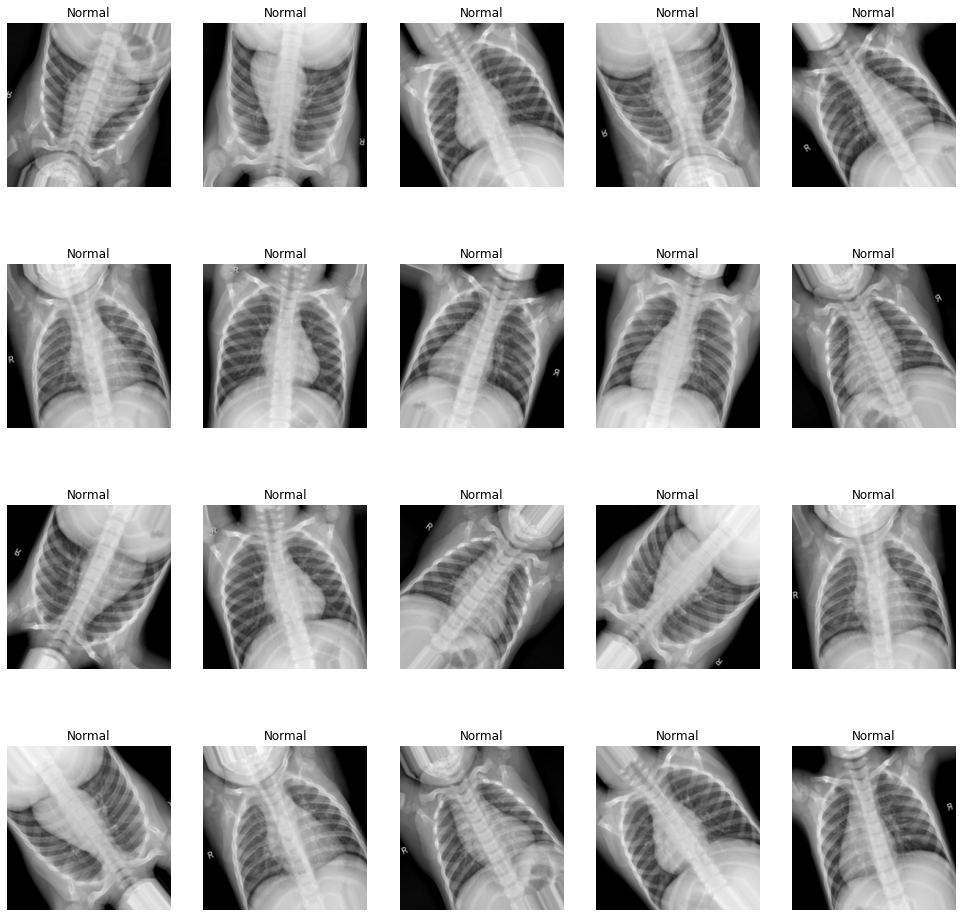

In [48]:
############### plotting 20 samples along with class label ###############
visualize_examples(x_normal_train,y_normal_train)

In [49]:
############### preparing training data of class "COVID-19" with data augmentation ###############
x_aug_train=np.zeros((40,224,224,3),dtype='int')
k=0
for i in range(8):
    it=datagen.flow(x_covid_train,batch_size=1)
    temp=prepare_aug(it)
    for j in range(len(temp)):
        x_aug_train[k]=temp[j]
        k+=1
x_covid_train=np.copy(x_aug_train)
y_covid_train=np.tile(y_covid_train,(8,1))
print(x_covid_train.shape,y_covid_train.shape)

(40, 224, 224, 3) (40, 5)


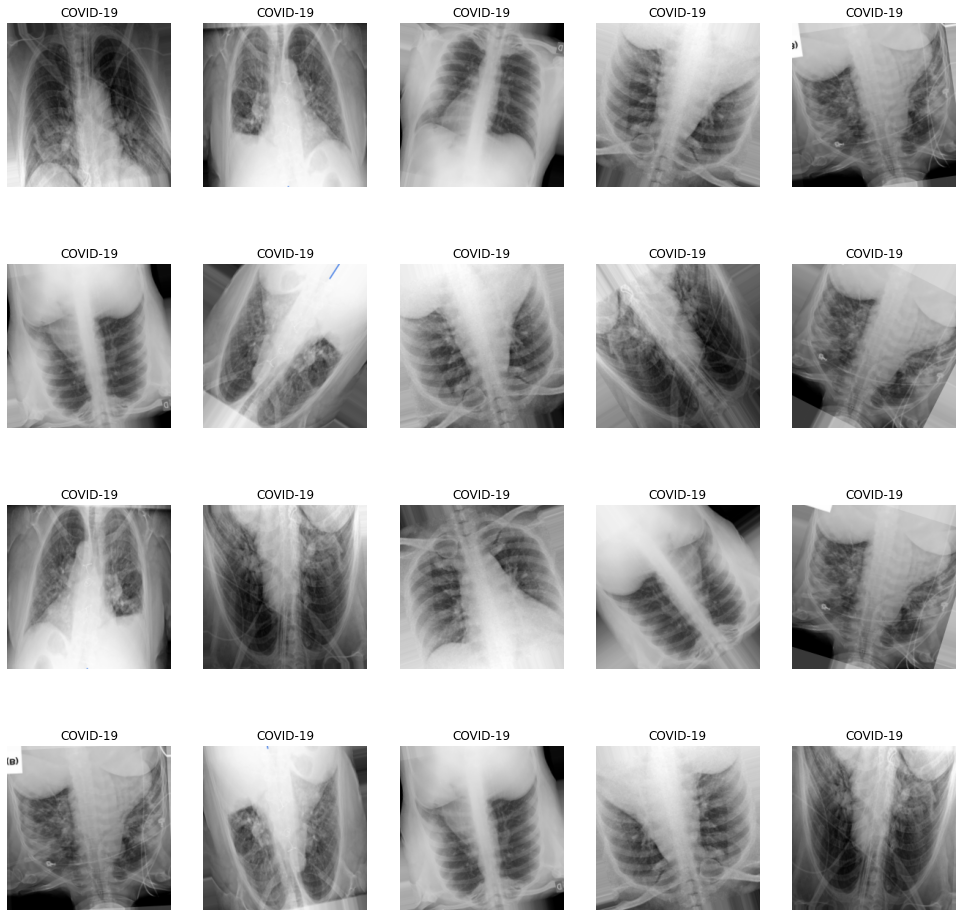

In [50]:
############### plotting 20 samples along with class label ###############
visualize_examples(x_covid_train,y_covid_train)

In [51]:
############### preparing training data of class "ARDS" with data augmentation ###############
x_aug_train=np.zeros((40,224,224,3),dtype='int')
k=0
for i in range(20):
    it=datagen.flow(x_ards_train,batch_size=1)
    temp=prepare_aug(it)
    for j in range(len(temp)):
        x_aug_train[k]=temp[j]
        k+=1
x_ards_train=np.copy(x_aug_train)
y_ards_train=np.tile(y_ards_train,(20,1))
print(x_ards_train.shape,y_ards_train.shape)

(40, 224, 224, 3) (40, 5)


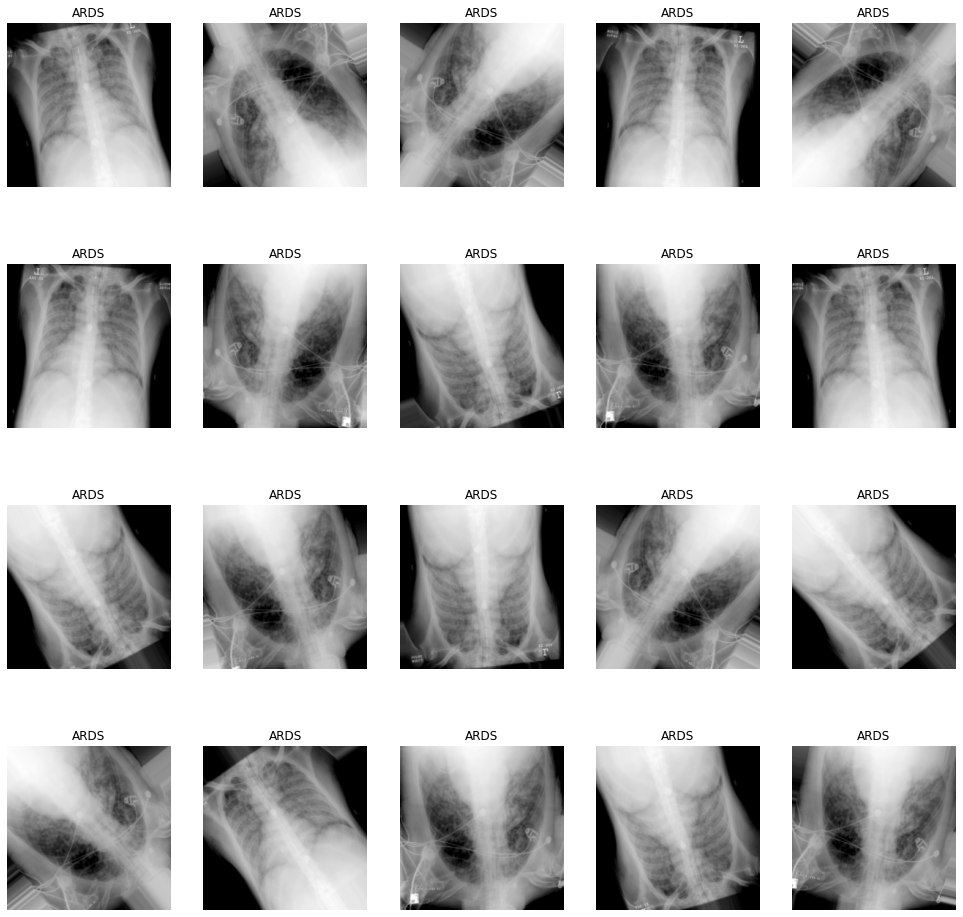

In [52]:
############### plotting 20 samples along with corresponding class label ###############
visualize_examples(x_ards_train,y_ards_train)

In [53]:
############### preparing training data of class "SARS" with data augmentation ###############
x_aug_train=np.zeros((44,224,224,3),dtype='int')
k=0
for i in range(4):
    it=datagen.flow(x_sars_train,batch_size=1)
    temp=prepare_aug(it)
    for j in range(len(temp)):
        x_aug_train[k]=temp[j]
        k+=1
x_sars_train=np.copy(x_aug_train)
y_sars_train=np.tile(y_sars_train,(4,1))
print(x_sars_train.shape,y_sars_train.shape)

(44, 224, 224, 3) (44, 5)


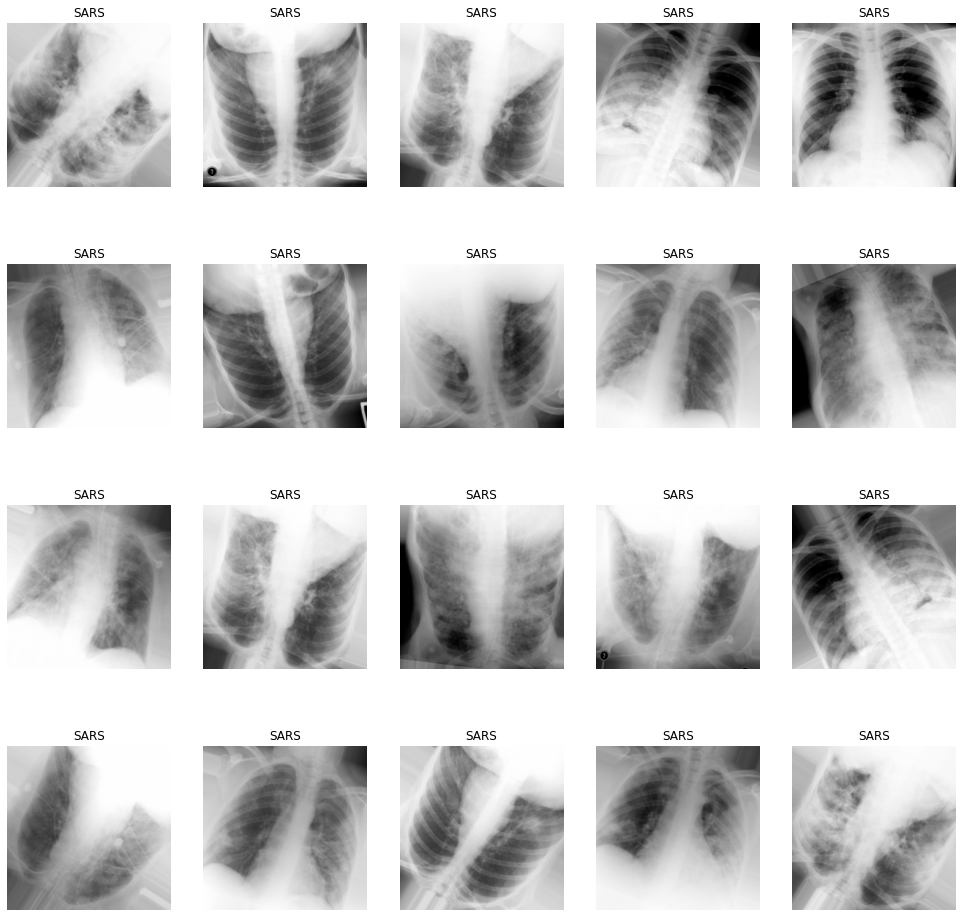

In [54]:
############### plotting 20 samples along with corresponding class label ###############
visualize_examples(x_sars_train,y_sars_train)

In [55]:
############### preparing training data of class "Streptococcus" with data augmentation ###############
x_aug_train=np.zeros((36,224,224,3),dtype='int')
k=0
for i in range(3):
    it=datagen.flow(x_strept_train,batch_size=1)
    temp=prepare_aug(it)
    for j in range(len(temp)):
        x_aug_train[k]=temp[j]
        k+=1
x_strept_train=np.copy(x_aug_train)
y_strept_train=np.tile(y_strept_train,(3,1))
print(x_strept_train.shape,y_strept_train.shape)

(36, 224, 224, 3) (36, 5)


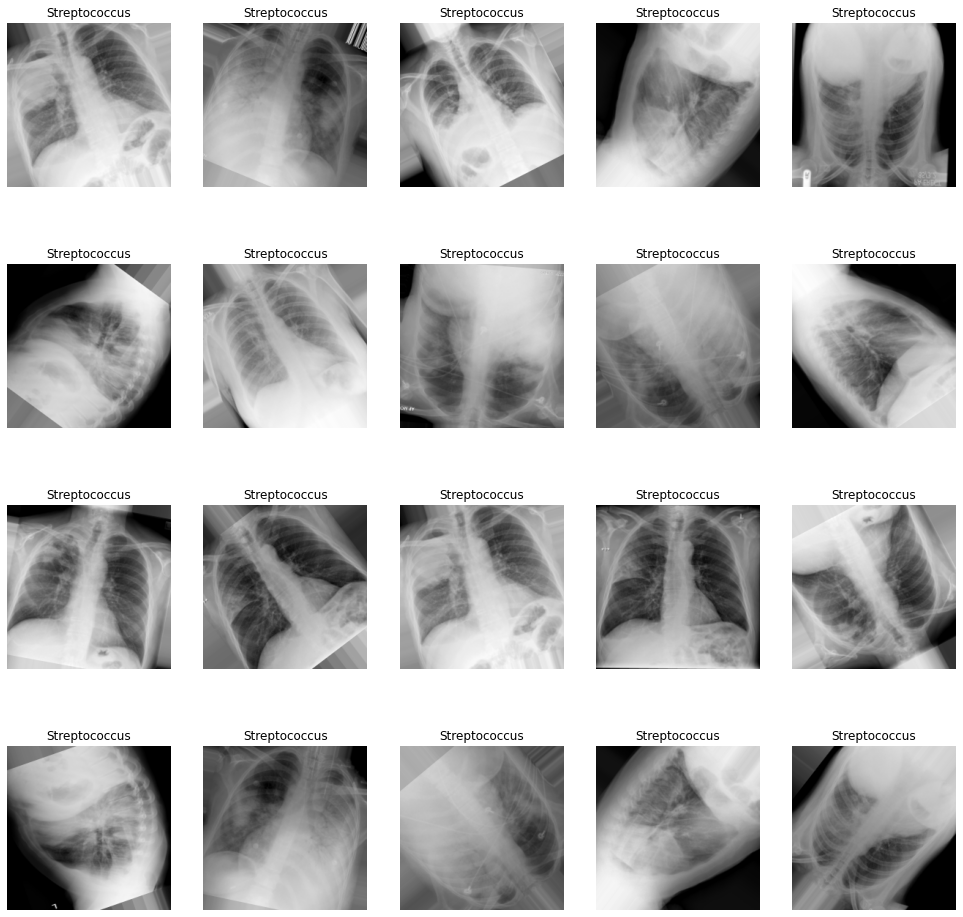

In [56]:
############### plotting 20 samples along with their corresponding class label ###############
visualize_examples(x_strept_train,y_strept_train)

In [57]:
############### final training data is prepared ###############
x_train=np.concatenate((x_normal_train,x_covid_train,x_ards_train,x_sars_train,x_strept_train),axis=0)
y_train=np.concatenate((y_normal_train,y_covid_train,y_ards_train,y_sars_train,y_strept_train),axis=0)
print(x_train.shape,y_train.shape)

(200, 224, 224, 3) (200, 5)


In [58]:
############### final testing data is prepared ###############
x_test,y_test=prepare_data('test')
#x_test=x_test/255.
print(x_test.shape,y_test.shape)

(24, 224, 224, 3) (24, 5)


In [59]:
############### plotting 10 random samples of data along with their class label ###############
def show_random_examples(x,y,p):
    indices=np.random.choice(range(x.shape[0]),10,replace=False)
    x=x[indices]
    y=y[indices]
    p=p[indices]
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i]),plt.xticks([]),plt.yticks([])
        col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])],color=col)
    plt.show()

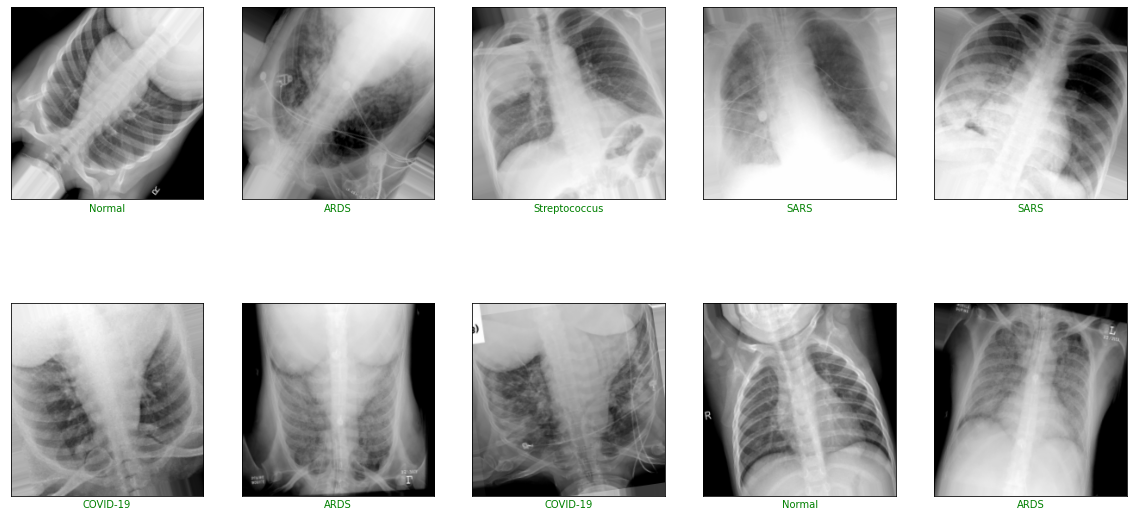

In [60]:
############### plotting 10 samples of training data along with their class label ###############
show_random_examples(x_train,y_train,y_train)

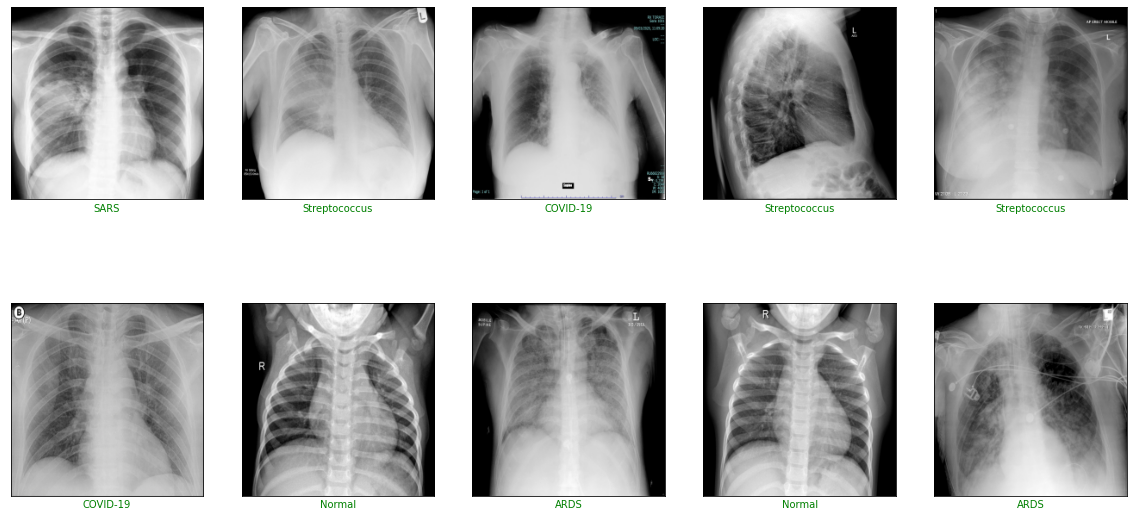

In [61]:
############### plotting 10 samples of testing data along with their class label ###############
show_random_examples(x_test,y_test,y_test)

In [63]:
############### loading VGG16 model for transfer learning ###############
vgg_model=keras.applications.VGG16(include_top=False,weights='imagenet',input_tensor=Input(shape=(224,224,3)))
vgg_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [64]:
############### creating model using transfer learning from VGG16 ###############
def create_model_vgg():
    model = Sequential()
    model.add(vgg_model)
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(GaussianNoise(0.3))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(5, activation='softmax'))
    for layer in vgg_model.layers:
        layer.trainable=False
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

model_vgg=create_model_vgg()
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)              

In [65]:
############### create output directory to save models which yield maximum validation accuracy ###############
if not os.path.isdir('/kaggle/working/model_vgg/'):
    os.mkdir('/kaggle/working/model_vgg/')
file_path='/kaggle/working/model_vgg/'

In [66]:
############### preprocessing data ###############
x_vgg_train=tf.keras.applications.vgg16.preprocess_input(x_train)
x_vgg_test=tf.keras.applications.vgg16.preprocess_input(x_test)

In [67]:
############### training model built using VGG16 ###############
%%time
h_vgg=model_vgg.fit(x_vgg_train,y_train,
          validation_data=(x_vgg_test,y_test),
          epochs=20,batch_size=16,
          callbacks=[
          ModelCheckpoint(os.path.join(file_path,'model_{val_accuracy:.3f}.h5'), save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy')
    ]
)

Train on 200 samples, validate on 24 samples
Epoch 1/20
200/200 [==============================] - 5s 23ms/step - loss: 1.3175 - accuracy: 0.5650 - val_loss: 1.9693 - val_accuracy: 0.7083
Epoch 2/20
200/200 [==============================] - 1s 4ms/step - loss: 0.5328 - accuracy: 0.8050 - val_loss: 1.2467 - val_accuracy: 0.6667
Epoch 3/20
200/200 [==============================] - 1s 4ms/step - loss: 0.2704 - accuracy: 0.9250 - val_loss: 0.9331 - val_accuracy: 0.7083
Epoch 4/20
200/200 [==============================] - 1s 4ms/step - loss: 0.2143 - accuracy: 0.9150 - val_loss: 0.8020 - val_accuracy: 0.7083
Epoch 5/20
200/200 [==============================] - 1s 4ms/step - loss: 0.2184 - accuracy: 0.9150 - val_loss: 0.7588 - val_accuracy: 0.7500
Epoch 6/20
200/200 [==============================] - 1s 4ms/step - loss: 0.1602 - accuracy: 0.9450 - val_loss: 0.7207 - val_accuracy: 0.7917
Epoch 7/20
200/200 [==============================] - 1s 4ms/step - loss: 0.1214 - accuracy: 0.9800 - 

In [68]:
############### loading model which has highest validation accuracy ###############
model=tf.keras.models.load_model('/kaggle/working/model_vgg/model_0.792.h5')

In [69]:
############### evaluating the performance of model ###############
result=model.evaluate(x_test,y_test,batch_size=2)

24/24 [==============================] - 1s 22ms/sample - loss: 1.1185 - accuracy: 0.7500


In [70]:
############### prediction ###############
preds=model.predict(x_test)

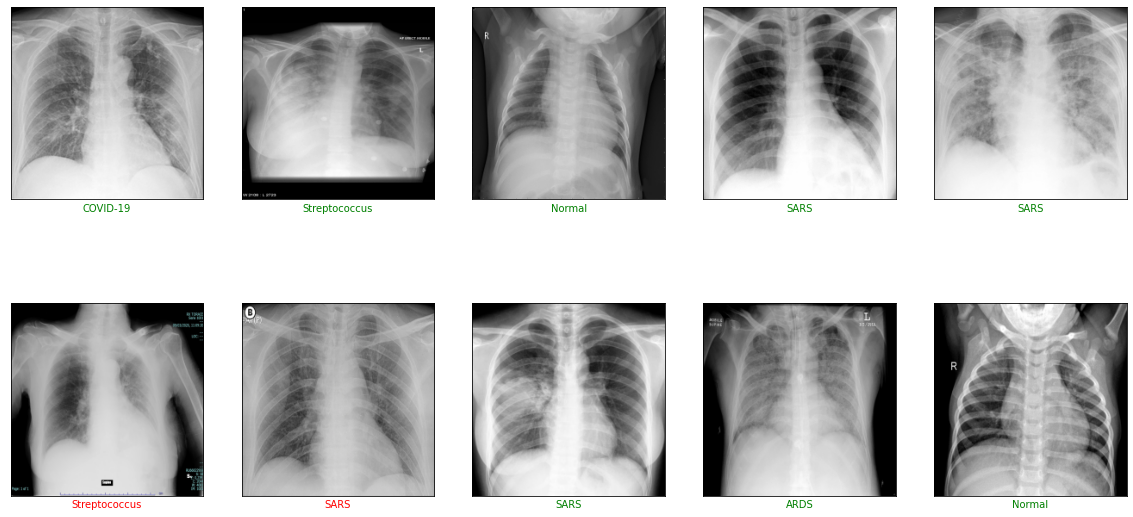

In [71]:
############### plotting 10 samples with the label(green if predicted matches actual,red if predicted does not match actual) ###############
show_random_examples(x_test,y_test,preds)

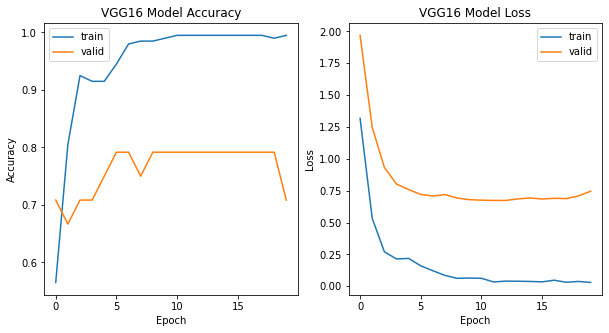

In [72]:
############### plotting model loss and accuracy ###############
acc_vgg=h_vgg.history['accuracy']
val_acc_vgg=h_vgg.history['val_accuracy']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(acc_vgg)
plt.plot(val_acc_vgg)
plt.title("VGG16 Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','valid'])
loss_vgg=h_vgg.history['loss']
val_loss_vgg=h_vgg.history['val_loss']
plt.subplot(1,2,2)
plt.plot(loss_vgg)
plt.plot(val_loss_vgg)
plt.title("VGG16 Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'])
plt.show()

In [73]:
############### creating model using transfer learning from ResNet50 ###############
def create_model_res():
    resnet_model = keras.applications.ResNet50(
        include_top=False, 
        weights='imagenet',
        input_shape=(224, 224, 3)
    )
    model = Sequential()
    model.add(resnet_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Dense(5, activation='softmax'))
    for layer in resnet_model.layers:
        if isinstance(layer,BatchNormalization):
            layer.trainable=True
        else:
            layer.trainable=False
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
model_res=create_model_res()
model_res.summary()

/opt/conda/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 1285      
Total params: 24,114,565
Trainable params: 579,461
Non-

In [74]:
############### creating output directory to store model which yields maximum validation accuracy ###############
if not os.path.isdir('/kaggle/working/model_res/'):
    os.mkdir('/kaggle/working/model_res/')
file_path='/kaggle/working/model_res/'

In [75]:
############### preprocess data ###############
x_res_train=tf.keras.applications.resnet.preprocess_input(x_train)
x_res_test=tf.keras.applications.resnet.preprocess_input(x_test)

In [76]:
############### training model built using ResNet50 ###############
%%time
h_res=model_res.fit(x_res_train,y_train,
          validation_data=(x_res_test,y_test),
          epochs=20,batch_size=16,
          callbacks=[
        ModelCheckpoint(os.path.join(file_path,'model_{val_accuracy:.3f}.h5'), save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy')
        #EarlyStopping(patience=3, restore_best_weights=True),ReduceLROnPlateau(patience=2)
    ]
)

Train on 200 samples, validate on 24 samples
Epoch 1/20
200/200 [==============================] - 20s 100ms/step - loss: 0.8965 - accuracy: 0.6650 - val_loss: 2.7822 - val_accuracy: 0.5000
Epoch 2/20
200/200 [==============================] - 2s 11ms/step - loss: 0.1541 - accuracy: 0.9600 - val_loss: 2.4819 - val_accuracy: 0.5000
Epoch 3/20
200/200 [==============================] - 2s 11ms/step - loss: 0.1127 - accuracy: 0.9700 - val_loss: 2.0701 - val_accuracy: 0.5833
Epoch 4/20
200/200 [==============================] - 2s 11ms/step - loss: 0.0560 - accuracy: 0.9850 - val_loss: 1.7624 - val_accuracy: 0.6667
Epoch 5/20
200/200 [==============================] - 2s 11ms/step - loss: 0.0542 - accuracy: 0.9850 - val_loss: 1.4363 - val_accuracy: 0.6667
Epoch 6/20
200/200 [==============================] - 2s 11ms/step - loss: 0.0349 - accuracy: 0.9950 - val_loss: 1.2180 - val_accuracy: 0.7083
Epoch 7/20
200/200 [==============================] - 2s 11ms/step - loss: 0.0149 - accuracy: 1

In [77]:
############### loading model which has highest validation accuracy ###############
model_res=tf.keras.models.load_model('/kaggle/working/model_res/model_0.750.h5')

In [78]:
############### prediction ###############
pred_res=model_res.predict(x_res_test)

In [79]:
############### evaluating performance of model ###############
ev=model_res.evaluate(x_res_test,y_test,batch_size=8)

24/24 [==============================] - 1s 39ms/sample - loss: 1.0791 - accuracy: 0.7500


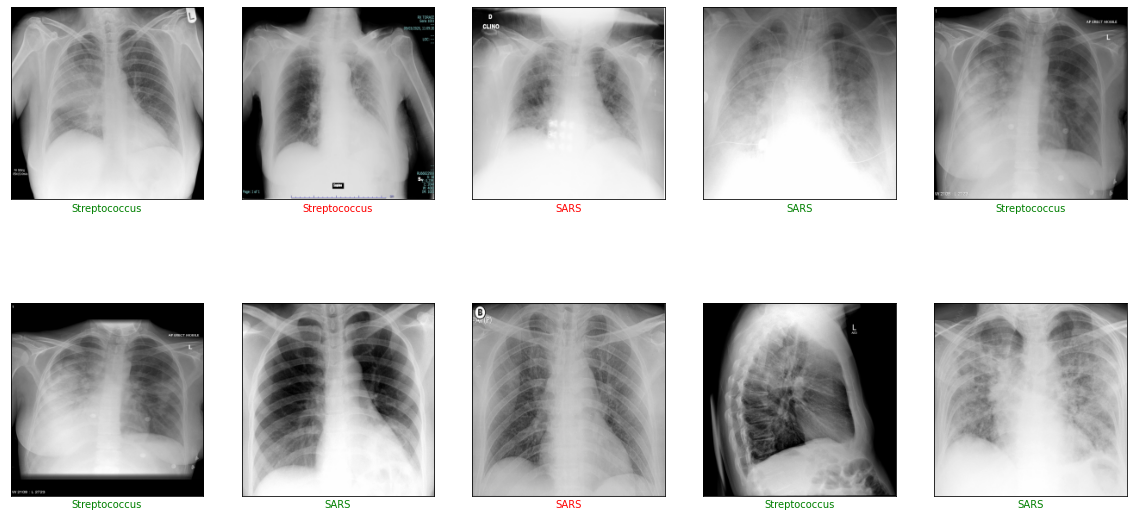

In [80]:
############### plotting 10 samples with label(green if actual matches predicted,red if actual does not match predicted) ###############
show_random_examples(x_test,y_test,pred_res)

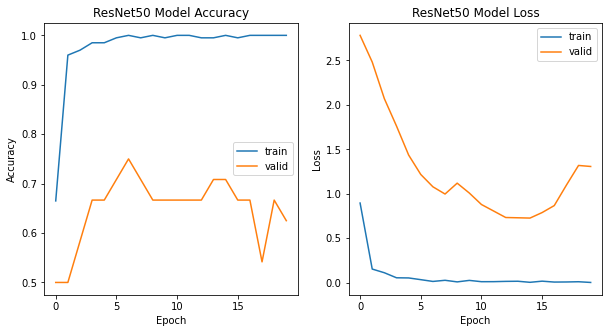

In [81]:
############### plotting model loss and accuracy ###############
acc_res=h_res.history['accuracy']
val_acc_res=h_res.history['val_accuracy']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(acc_res)
plt.plot(val_acc_res)
plt.title("ResNet50 Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','valid'])
loss_res=h_res.history['loss']
val_loss_res=h_res.history['val_loss']
plt.subplot(1,2,2)
plt.plot(loss_res)
plt.plot(val_loss_res)
plt.title("ResNet50 Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'])
plt.show()